<a href="https://colab.research.google.com/github/jijan67/Twitter-Sentiment-Analysis-Using-CNN/blob/main/Twitter_Sentiment_Analysis_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
import spacy


In [ ]:
# Load the data
df_train = pd.read_csv("/content/drive/MyDrive/Sentiment analysis/twitter_training.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Sentiment analysis/twitter_validation.csv")


In [ ]:
# Rename columns
df_train.columns = ['Header1', 'company', 'labels', 'text']
df_test.columns = ['Header1', 'company', 'labels', 'text']


In [ ]:
# Drop unnecessary columns
df_train.drop(columns=['Header1', 'company'], inplace=True)
df_test.drop(columns=['Header1', 'company'], inplace=True)

In [ ]:
def clean_tweet(tweet):
    # Ensure the tweet is a string, if not return an empty string
    if not isinstance(tweet, str):
        return ""

    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#', '', tweet)
    # Remove special characters, numbers, and punctuations
    tweet = re.sub(r'\W', ' ', tweet)
    tweet = re.sub(r'\d', ' ', tweet)
    tweet = re.sub(r'\s+', ' ', tweet)
    tweet = tweet.strip()

    return tweet

In [ ]:
# Clean and preprocess the data
df_train['text'] = df_train['text'].apply(clean_tweet).str.lower()
df_test['text'] = df_test['text'].apply(clean_tweet).str.lower()

In [ ]:
# Remove empty or whitespace-only texts
df_train = df_train[df_train['text'].str.strip() != '']
df_test = df_test[df_test['text'].str.strip() != '']


In [ ]:
# Remove duplicates
df_train = df_train.drop_duplicates(subset=['text'])


In [ ]:
# Separate features and labels
train_texts = df_train['text'].values
train_labels = df_train['labels'].values
test_texts = df_test['text'].values
test_labels = df_test['labels'].values


In [ ]:
# Encode the labels
label_encoder = LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)

In [ ]:
# Tokenize the text
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_texts)
tokenizer.fit_on_texts(test_texts)


In [ ]:
# Convert texts to sequences
train_sequences = tokenizer.texts_to_sequences(train_texts)
test_sequences = tokenizer.texts_to_sequences(test_texts)


In [ ]:
# Pad the sequences
maxlen = max(len(tokens) for tokens in train_sequences)
train_padded = pad_sequences(train_sequences, maxlen=maxlen, padding='post')
test_padded = pad_sequences(test_sequences, maxlen=maxlen, padding='post')


In [ ]:
# Get input size for the embedding layer
input_size = np.max(train_padded) + 1


In [ ]:
# Define the CNN model
cnn_model = Sequential()
cnn_model.add(Embedding(input_dim=input_size, output_dim=100, input_length=maxlen))
cnn_model.add(Conv1D(128, kernel_size=5, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
cnn_model.add(Conv1D(64, kernel_size=5, activation='relu'))
cnn_model.add(BatchNormalization())
cnn_model.add(Dropout(0.5))
cnn_model.add(GlobalMaxPooling1D())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(len(label_encoder.classes_), activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
# Compile the model
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# Train the model
cnn_history = cnn_model.fit(train_padded, train_labels_encoded, validation_data=(test_padded, test_labels_encoded), epochs=20)


Epoch 1/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.3008 - loss: 1.8979 - val_accuracy: 0.2633 - val_loss: 1.3722
Epoch 2/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.3277 - loss: 1.3484 - val_accuracy: 0.4825 - val_loss: 1.1436
Epoch 3/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.5123 - loss: 1.0827 - val_accuracy: 0.7067 - val_loss: 0.7051
Epoch 4/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.7245 - loss: 0.7066 - val_accuracy: 0.8579 - val_loss: 0.4268
Epoch 5/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8456 - loss: 0.4486 - val_accuracy: 0.9199 - val_loss: 0.3079
Epoch 6/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8888 - loss: 0.3256 - val_accuracy: 0.9159 - val_loss: 0.2999
Epoch 7/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9111 - loss: 0.2672 - val_accuracy: 0.9219 - val_loss: 0.2597
Epoch 8/20
2075/2075 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9299 - loss: 0.2154

In [ ]:
# Evaluate the model
cnn_test_loss, cnn_test_accuracy = cnn_model.evaluate(test_padded, test_labels_encoded)
print(f'CNN Test Loss: {cnn_test_loss}')
print(f'CNN Test Accuracy: {cnn_test_accuracy}')


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9418 - loss: 0.3201 
CNN Test Loss: 0.2831490933895111
CNN Test Accuracy: 0.9439439177513123


In [ ]:
# Make predictions
predictions = cnn_model.predict(test_padded)
predicted_labels = np.argmax(predictions, axis=1)


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step


In [ ]:
# Generate a classification report
print("\nClassification Report:\n")
print(classification_report(test_labels_encoded, predicted_labels, target_names=label_encoder.classes_))



Classification Report:

              precision    recall  f1-score   support

  Irrelevant       0.96      0.94      0.95       171
    Negative       0.93      0.98      0.95       266
     Neutral       0.93      0.93      0.93       285
    Positive       0.97      0.92      0.94       277

    accuracy                           0.94       999
   macro avg       0.95      0.94      0.94       999
weighted avg       0.94      0.94      0.94       999



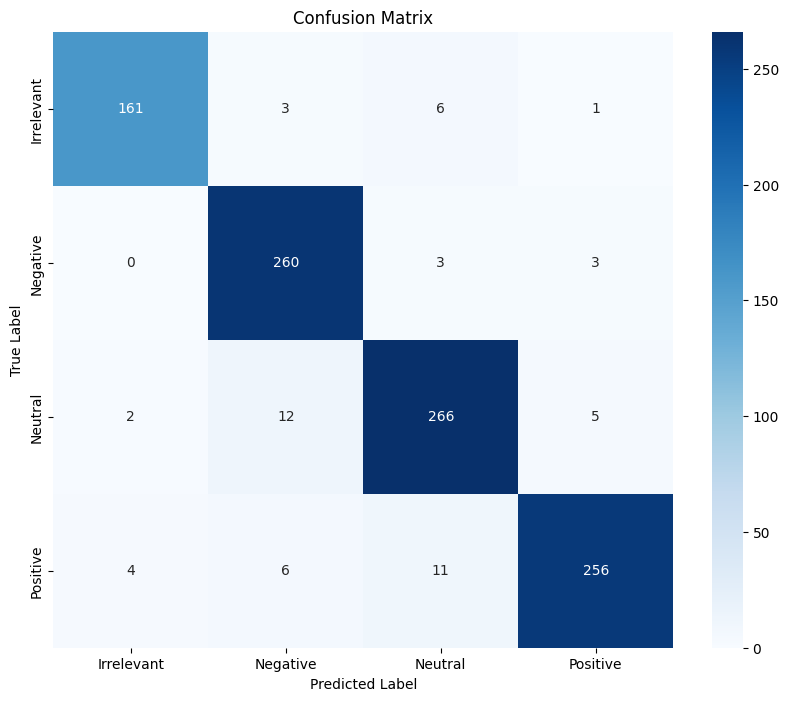

In [ ]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(test_labels_encoded, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

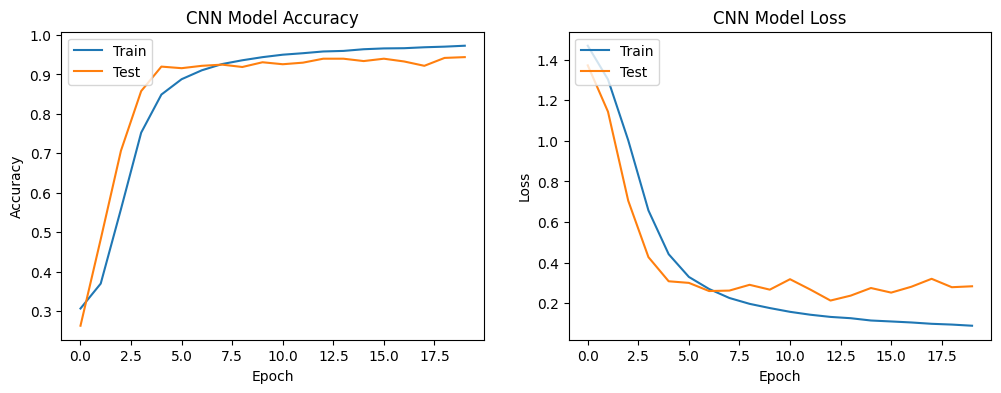

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('CNN Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('CNN Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.show()

In [ ]:
# Custom prediction function for new text input
def predict_text(text, model, tokenizer, label_encoder, maxlen):
    # Clean the input text
    cleaned_text = clean_tweet(text).lower()

    # Tokenize and pad the text
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=maxlen, padding='post')

    # Make a prediction
    prediction = model.predict(padded_sequence)
    predicted_label = np.argmax(prediction, axis=1)

    # Decode the label back to the original class name
    label_name = label_encoder.inverse_transform(predicted_label)

    return label_name[0]

# Test the function with a sample input
sample_text = "I love the customer service at this company!"
predicted_label = predict_text(sample_text, cnn_model, tokenizer, label_encoder, maxlen)
print("Predicted Sentiment/Label:", predicted_label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
Predicted Sentiment/Label: Negative
